In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
plt.rcParams['font.family'] = 'Liberation Sans'

import seaborn as sns
import kagglehub
import os

#!pip install pycaret
import pycaret
from pycaret.classification import *

In [8]:
# descargar la última versión del archivo
path = kagglehub.dataset_download("kartik2112/fraud-detection")

In [ ]:
st.title("Análisis Exploratorio de Datos")
csv_file_path = os.path.join(path, 'fraudTrain.csv')
# cargar el dataset en un DataFrame
df = pd.read_csv(csv_file_path, index_col=0)

st.subheader("Tabla de datos")
st.dataframe(df)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
df.trans_num.unique().size

1296675

## Variables


# Limpieza

In [11]:
df.shape

(1296675, 22)

In [12]:
unique_values = {col: df[col].nunique() for col in df.columns}
for variable, cantidad in unique_values.items():
    print(f'"{variable}", cantidad de valores únicos: {cantidad}')

"trans_date_trans_time", cantidad de valores únicos: 1274791
"cc_num", cantidad de valores únicos: 983
"merchant", cantidad de valores únicos: 693
"category", cantidad de valores únicos: 14
"amt", cantidad de valores únicos: 52928
"first", cantidad de valores únicos: 352
"last", cantidad de valores únicos: 481
"gender", cantidad de valores únicos: 2
"street", cantidad de valores únicos: 983
"city", cantidad de valores únicos: 894
"state", cantidad de valores únicos: 51
"zip", cantidad de valores únicos: 970
"lat", cantidad de valores únicos: 968
"long", cantidad de valores únicos: 969
"city_pop", cantidad de valores únicos: 879
"job", cantidad de valores únicos: 494
"dob", cantidad de valores únicos: 968
"trans_num", cantidad de valores únicos: 1296675
"unix_time", cantidad de valores únicos: 1274823
"merch_lat", cantidad de valores únicos: 1247805
"merch_long", cantidad de valores únicos: 1275745
"is_fraud", cantidad de valores únicos: 2


In [13]:
df.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [14]:
df = df.dropna()
df.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [15]:
df = df.drop_duplicates()
df.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [16]:
df=df.drop('trans_num',axis=1)
df=df.drop('unix_time',axis=1)

In [17]:
# pasar la fecha a datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [18]:
df['dob'] = pd.to_datetime(df['dob'])

In [19]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0


In [20]:
df.shape

(1296675, 20)

# Análisis exploratorio

1. Distribución de transacciones fraudulentas y transacciones no fraudulentas
2. Patrones relacionados a períodos determinados
3. Características relevantes en transacciones fraudulentas

In [21]:
fraudulent_count = df[df['is_fraud'] == 1].shape[0]
non_fraudulent_count = df[df['is_fraud'] == 0].shape[0]

fraudulent_count, non_fraudulent_count

(7506, 1289169)

In [22]:
distribucion = df['is_fraud'].value_counts(normalize=True) * 100
print("Distribución de clases (en porcentaje):")
print(distribucion)

Distribución de clases (en porcentaje):
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

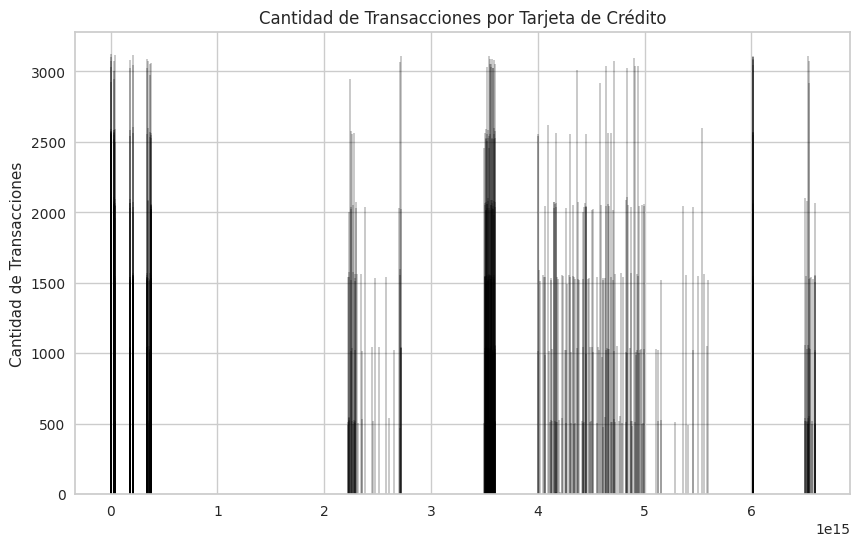

In [23]:
cc_frequency_df = df['cc_num'].value_counts().reset_index()
cc_frequency_df.columns = ['cc_num', 'frequency']
filtered_cc_frequency_df = cc_frequency_df[cc_frequency_df['cc_num'].astype(float) < 1*10**18]


# Graficar la frecuencia de transacciones por cada tarjeta de crédito
plt.figure(figsize=(10, 6))
plt.bar(filtered_cc_frequency_df['cc_num'], filtered_cc_frequency_df['frequency'], color='skyblue', edgecolor='black')
plt.ylabel('Cantidad de Transacciones')
plt.title('Cantidad de Transacciones por Tarjeta de Crédito')
plt.show()

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

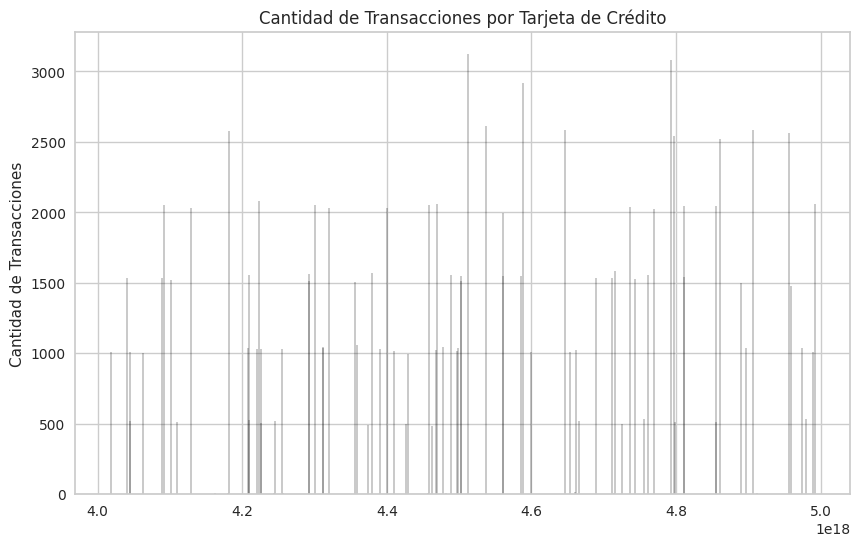

In [24]:
cc_frequency_df = df['cc_num'].value_counts().reset_index()
cc_frequency_df.columns = ['cc_num', 'frequency']
filtered_cc_frequency_df = cc_frequency_df[cc_frequency_df['cc_num'].astype(float) > 1*10**18]


# Graficar la frecuencia de transacciones por cada tarjeta de crédito
plt.figure(figsize=(10, 6))
plt.bar(filtered_cc_frequency_df['cc_num'], filtered_cc_frequency_df['frequency'], color='skyblue', edgecolor='black')
plt.ylabel('Cantidad de Transacciones')
plt.title('Cantidad de Transacciones por Tarjeta de Crédito')
plt.show()

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

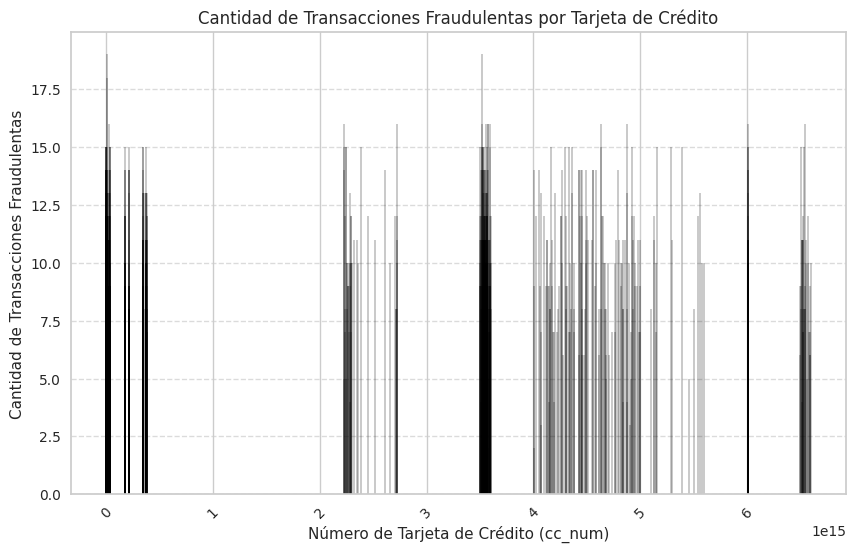

In [25]:
fraud_transactions = df[df['is_fraud'] == 1]

# Contar la cantidad de transacciones fraudulentas por tarjeta
fraud_count_by_card = fraud_transactions['cc_num'].value_counts().reset_index()
fraud_count_by_card.columns = ['cc_num', 'frequency']
fraud_count_by_card = fraud_count_by_card[fraud_count_by_card['cc_num'].astype(float) < 1*10**18]

# Graficar la cantidad de transacciones fraudulentas por tarjeta
plt.figure(figsize=(10, 6))
plt.bar(fraud_count_by_card['cc_num'], fraud_count_by_card['frequency'], color='salmon', edgecolor='black')
plt.xlabel('Número de Tarjeta de Crédito (cc_num)')
plt.ylabel('Cantidad de Transacciones Fraudulentas')
plt.title('Cantidad de Transacciones Fraudulentas por Tarjeta de Crédito')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

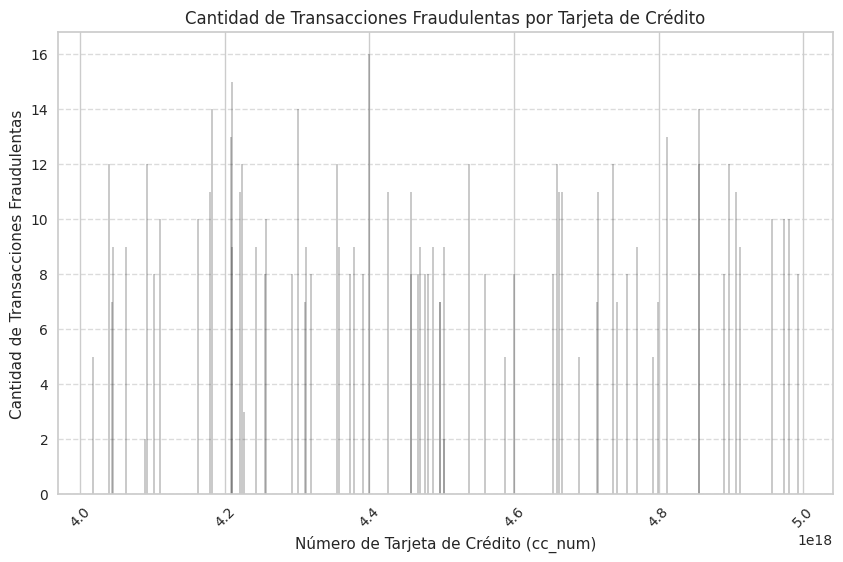

In [26]:
fraud_transactions = df[df['is_fraud'] == 1]

# Contar la cantidad de transacciones fraudulentas por tarjeta
fraud_count_by_card = fraud_transactions['cc_num'].value_counts().reset_index()
fraud_count_by_card.columns = ['cc_num', 'frequency']
fraud_count_by_card = fraud_count_by_card[fraud_count_by_card['cc_num'].astype(float) > 1*10**18]

# Graficar la cantidad de transacciones fraudulentas por tarjeta
plt.figure(figsize=(10, 6))
plt.bar(fraud_count_by_card['cc_num'], fraud_count_by_card['frequency'], color='salmon', edgecolor='black')
plt.xlabel('Número de Tarjeta de Crédito (cc_num)')
plt.ylabel('Cantidad de Transacciones Fraudulentas')
plt.title('Cantidad de Transacciones Fraudulentas por Tarjeta de Crédito')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
df=df.drop('cc_num',axis=1)
df=df.drop('first',axis=1)
df=df.drop('last',axis=1)
df=df.drop('street',axis=1)
df=df.drop('city',axis=1)
df=df.drop('zip',axis=1)

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

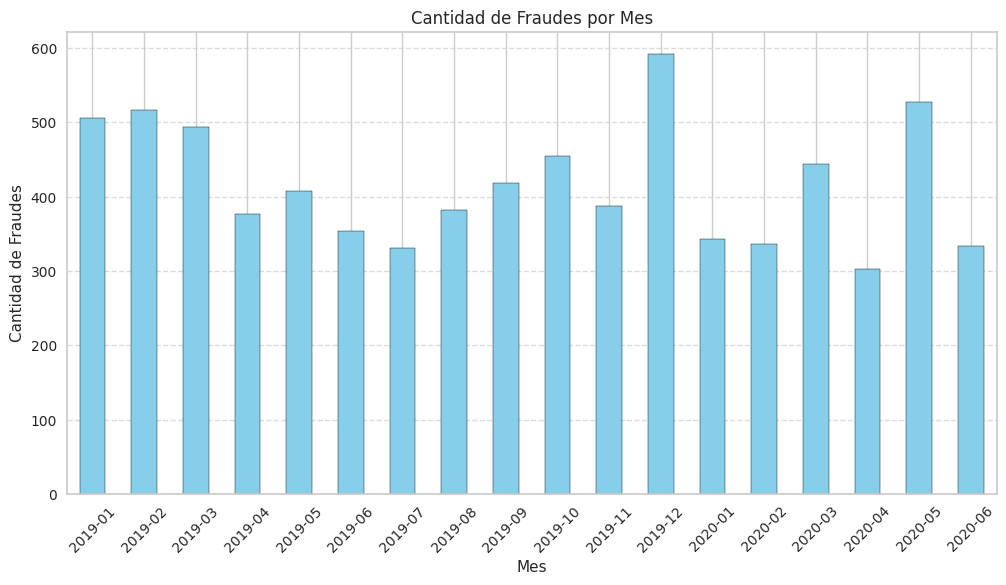

In [28]:
# cantidad de fraudes por mes
fraud_df = df[df['is_fraud'] == 1]

# Agrupar por mes para contar los fraudes por mes
fraud_df['month'] = fraud_df['trans_date_trans_time'].dt.to_period('M')
fraud_count_by_month = fraud_df.groupby('month').size()

# Graficar los fraudes con respecto al tiempo utilizando un gráfico de barras agrupado por mes
plt.figure(figsize=(12, 6))
fraud_count_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Fraudes')
plt.title('Cantidad de Fraudes por Mes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

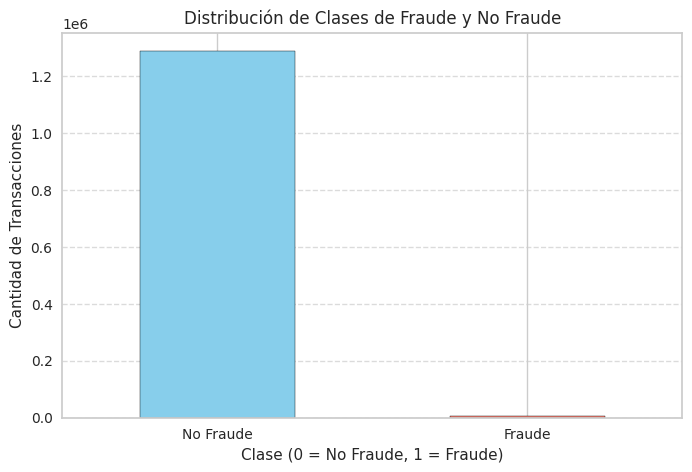

In [29]:
# distribución de clases de fraude y no fraude
fraud_class_distribution = df['is_fraud'].value_counts()

# Graficar la distribución de clases de fraude y no fraude
plt.figure(figsize=(8, 5))
fraud_class_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.xlabel('Clase (0 = No Fraude, 1 = Fraude)')
plt.ylabel('Cantidad de Transacciones')
plt.title('Distribución de Clases de Fraude y No Fraude')
plt.xticks(ticks=[0, 1], labels=['No Fraude', 'Fraude'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

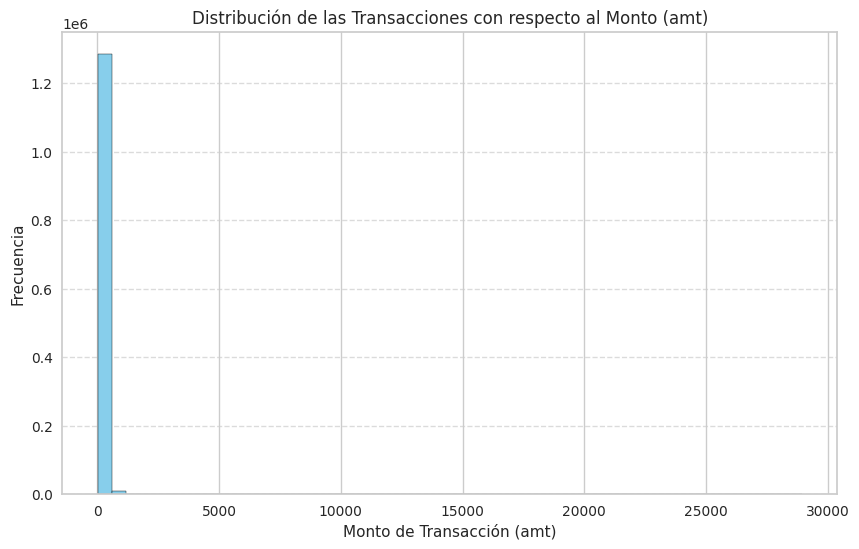

In [30]:
# Graficar la distribución de la variable 'amt'
plt.figure(figsize=(10, 6))
plt.hist(df['amt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Monto de Transacción (amt)')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Transacciones con respecto al Monto (amt)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
high_value_transactions_count = df[df['amt'] > 1500].shape[0]
high_value_transactions_count

1296

In [32]:
high_value_fraud_count = df[(df['amt'] > 1500) & (df['is_fraud'] == 1)].shape[0]
high_value_fraud_count

0

In [33]:
df = df[df['amt'] <= 1500]

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

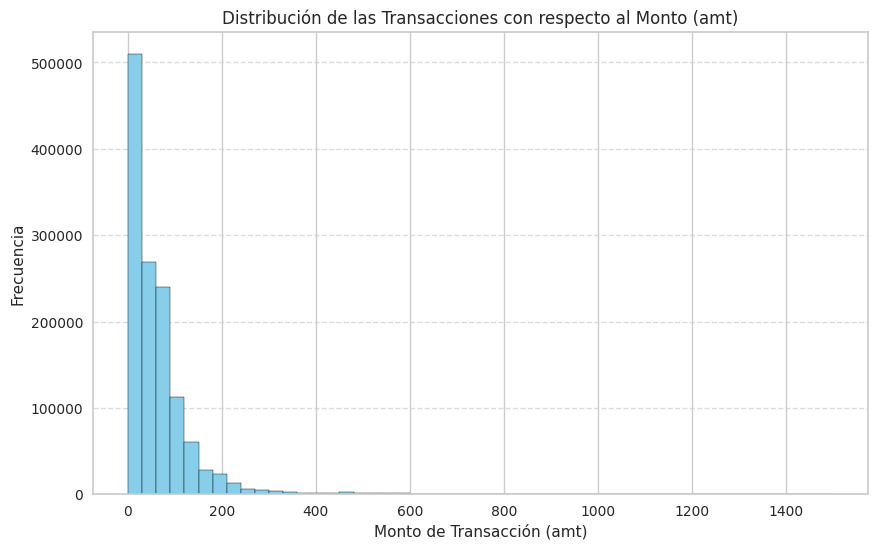

In [34]:
# Graficar la distribución de la variable 'amt'
plt.figure(figsize=(10, 6))
plt.hist(df['amt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Monto de Transacción (amt)')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Transacciones con respecto al Monto (amt)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

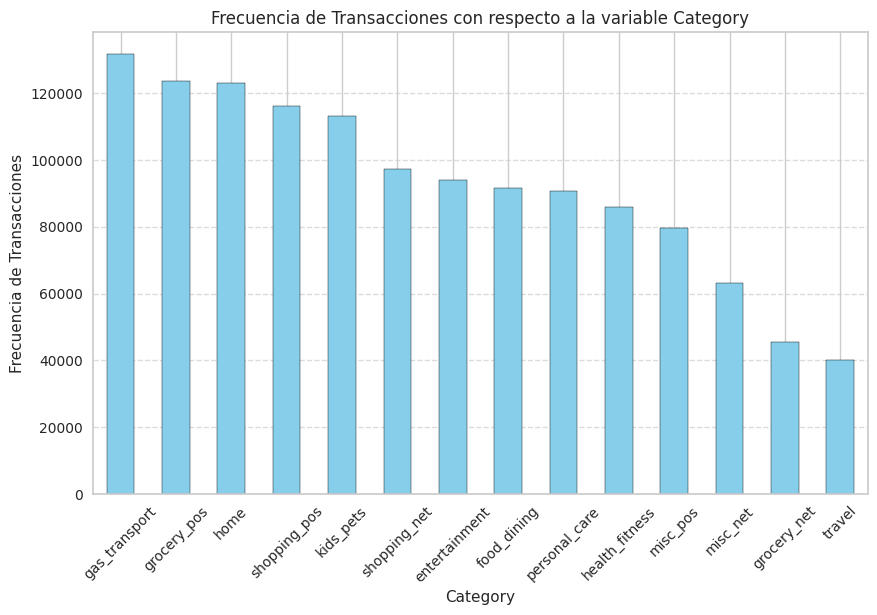

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

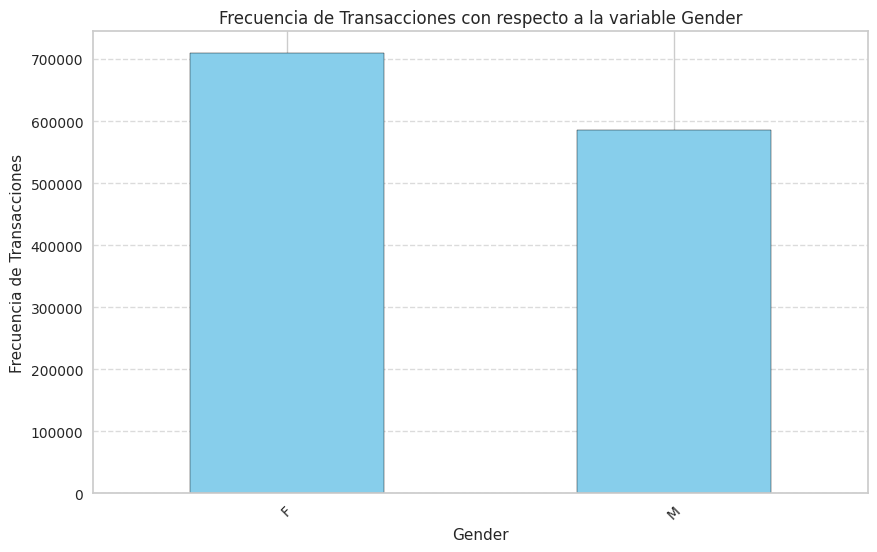

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

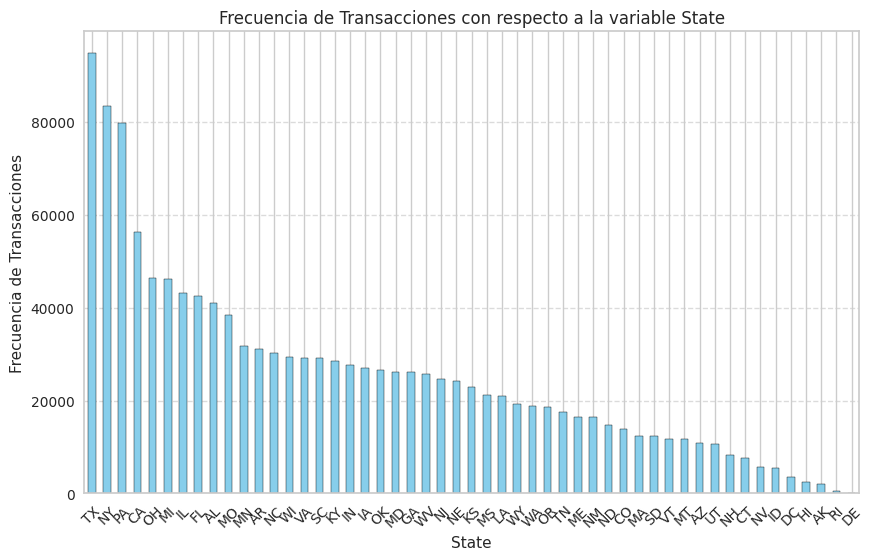

In [35]:
# grafico el resto de variables
# Lista de variables a graficar
variables = [ 'category', 'gender', 'state']

# Graficar la frecuencia de transacciones para cada variable
for var in variables:
    plt.figure(figsize=(10, 6))
    df[var].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frecuencia de Transacciones')
    plt.title(f'Frecuencia de Transacciones con respecto a la variable {var.capitalize()}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [36]:
#creamos una columna de edad, utilizando el variable de fecha de nacimiento
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Ajustar la edad si la persona aún no cumplió años ese año
df['age'] -= ((df['trans_date_trans_time'].dt.month < df['dob'].dt.month) |
              ((df['trans_date_trans_time'].dt.month == df['dob'].dt.month) &
               (df['trans_date_trans_time'].dt.day < df['dob'].dt.day)))

# Eliminar la columna 'dob'
df = df.drop(columns=['dob'])

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

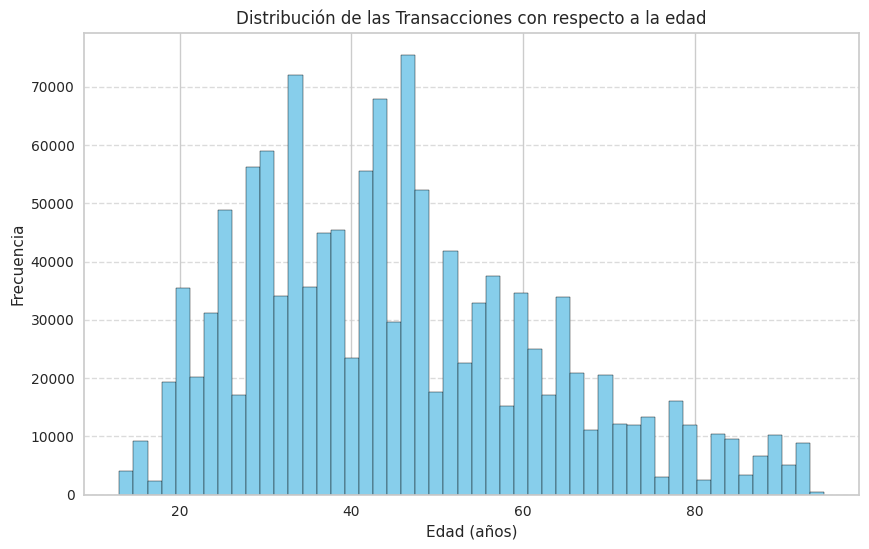

In [37]:
# Graficar la distribución de la variable 'age'
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Transacciones con respecto a la edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
fraudulent_count = df[df['is_fraud'] == 1].shape[0]
non_fraudulent_count = df[df['is_fraud'] == 0].shape[0]

fraudulent_count, non_fraudulent_count

(7506, 1287873)

In [39]:
df.shape

(1295379, 14)

In [40]:
for column in df.columns:
    print(f"{column}, tipo: {df[column].dtype}")

trans_date_trans_time, tipo: datetime64[ns]
merchant, tipo: object
category, tipo: object
amt, tipo: float64
gender, tipo: object
state, tipo: object
lat, tipo: float64
long, tipo: float64
city_pop, tipo: int64
job, tipo: object
merch_lat, tipo: float64
merch_long, tipo: float64
is_fraud, tipo: int64
age, tipo: int32


# Modelos supervisados

# Importe del test

In [41]:
csv_file_path_test = os.path.join(path, 'fraudTest.csv')
# cargar el dataset en un DataFrame
df_test = pd.read_csv(csv_file_path_test, index_col=0)

In [42]:
# cambiar "dob" a edad:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])
#creamos una columna de edad, utilizando el variable de fecha de nacimiento
df_test['age'] = df_test['trans_date_trans_time'].dt.year - df_test['dob'].dt.year

# Ajustar la edad si la persona aún no cumplió años ese año
df_test['age'] -= ((df_test['trans_date_trans_time'].dt.month < df_test['dob'].dt.month) |
              ((df_test['trans_date_trans_time'].dt.month == df_test['dob'].dt.month) &
               (df_test['trans_date_trans_time'].dt.day < df_test['dob'].dt.day)))

# Eliminar la columna 'dob' y el resto de columnas que no usaremos
df_test = df_test.drop(columns=['dob','cc_num', 'first', 'last', 'street', 'city', 'zip', 'trans_num', 'unix_time'])

In [43]:
fraudTrain = df.drop(columns=['trans_date_trans_time'])
fraudTest = df_test.drop(columns=['trans_date_trans_time'])

In [44]:
fraudTrain.shape

(1295379, 13)

In [45]:
fraudTest.shape

(555719, 13)

In [46]:
clf = setup(
    data=fraudTrain,
    target='is_fraud',
    session_id=123,
    numeric_features=['amt', 'city_pop', 'merch_lat', 'merch_long','lat','long','age'],
    categorical_features=['category', 'gender', 'state', 'job', 'merchant'],
    fix_imbalance=True  #Balance de clases
)

,Description,Value
0,Session id,123
1,Target,is_fraud
2,Target type,Binary
3,Original data shape,"(1295379, 13)"
4,Transformed data shape,"(2191636, 26)"
5,Transformed train set shape,"(1803022, 26)"
6,Transformed test set shape,"(388614, 26)"
7,Numeric features,7
8,Categorical features,5
9,Preprocess,True


In [ ]:
models_to_include = [
    'dt', 'et', 'ada', 'gbc',
    'xgboost', 'lightgbm'
]

: 

In [ ]:

best_models = compare_models(
    include=models_to_include,
    fold=5,
    round=2,
    sort='Recall',
    n_select=3
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:40:11
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(best_models[0], optimize='Recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:32:48
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 